<h1><center> House Hocket Insights Project </center></h1>


<h2> 1. Imports </h2>

In [1]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

<h3> 1.1. Helper Functions </h3>

In [2]:
def graph_bar(df, X, Y, title):
    
    #Graph
    plt.figure(figsize=(8,5))
    graph = sns.barplot( data= df, x=X, y=Y)

    #Creating figure
    plt.title(title, size=18)
    plt.xlabel(X, size=15)
    plt.ylabel(Y, size=15)
    plt.xticks(size=15)
        
    #Including data values in the bars
    for i in graph.containers:
        graph.bar_label(i, color='white', label_type= 'center',fontsize='x-large',fmt='%.2f')
    
    return graph

<h3> 1.2. Loading Data </h3>

In [3]:
#Loading the data into the notebook
path = r'dashboard_house_rocket\kc_house_data.csv'
data = pd.read_csv( path )

In [4]:
#Verifying the loaded data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


<h2> 2. Data Description </h2>

<h3> 2.1. Data Dimensions </h3>

In [5]:
print( f'Number of Rows: {data.shape[0]}' )
print( f'Number of Columns: {data.shape[1]}' )

Number of Rows: 21613
Number of Columns: 21


<h3> 2.2. Data Types </h3>

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<h4> 2.2.1 Data Types Changins </h4>

In [7]:
data['date'] = pd.to_datetime( data['date'] )
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

<h3> 2.3. Check NA </h3>

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h3> 2.4. Check duplicate </h3>

In [9]:
data['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

<h3> 2.5. Descriptive Statistical </h3>

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<h2> 3. Data Cleaning  </h2>

Based on the data description, the data cleaning will take place.  
The following procedures will be done.

    1- Two rows have missing data that will be removed.  
    2- Duplicate data will be also removed because represents the same house.
    3- Creating new features for the dataset 

<h3> 3.1. Removing the Null data </h3>

In [11]:
#Verifying the number of unique values
data['id'].nunique()

21436

In [12]:
#Droping the duplicates
data.drop_duplicates( subset=['id'], inplace=True, keep='first' )

In [13]:
print( f'Number of Rows after duplicates removing: {data.shape[0]}' )

Number of Rows after duplicates removing: 21436


<h3> 3.2. Removing duplicate data </h3>

In [14]:
data = data.dropna()

In [15]:
#verifying the null data after removing 
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h3> 3.3. Creating new columns </h3>

In [16]:
#Adding column day
data['day'] = data['date'].dt.day 

#Adding column week of year 
data['week_of_year'] = data['date'].dt.isocalendar().week

#Adding column month 
data['month'] = data.date.dt.strftime("%Y-%m")

#Adding column year
data['year'] = data['date'].dt.year

#Modifying the Waterfront feature.
data['waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

#Adding the seasons in the dataset based in the US
data['seasons'] = data['date'].apply(lambda x: 'Spring' if (x.day_of_year > 80) & (x.day_of_year <= 173) else
                                               'Summer' if (x.day_of_year > 173) & (x.day_of_year <= 267) else
                                               'Fall'   if (x.day_of_year > 267) & (x.day_of_year <= 356) else
                                               'Winter')

In [17]:
#Checking point after changins 
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,day,week_of_year,month,year,seasons
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,no,0,...,98178,47.5112,-122.257,1340,5650,13,42,2014-10,2014,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,no,0,...,98125,47.7210,-122.319,1690,7639,9,50,2014-12,2014,Fall
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,no,0,...,98028,47.7379,-122.233,2720,8062,25,9,2015-02,2015,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,no,0,...,98136,47.5208,-122.393,1360,5000,9,50,2014-12,2014,Fall
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,no,0,...,98074,47.6168,-122.045,1800,7503,18,8,2015-02,2015,Winter


<h2> 4. Exploratory Data Analysis (EDA)  </h2>

<h4> Hypothesis Test </h4>

   <b> H1: </b> Waterfront properties are 30% more expensive, on average.  
   <b> H2: </b> Buildings older than 1955 are 50% cheaper on average.  
   <b> H3: </b> Properties without a basement have a total area (sqrt_lot) 40% larger than properties with a basement.   
   <b> H4: </b> YoY (Year over Year) property price growth is 10%.  
   <b> H5: </b> Homes with 3 bathrooms have a 15% MoM (Month over Month) growth.  
   <b> H6: </b> Homes sold in winter are 50% cheaper than in other seasons.  
   <b> H7: </b> H7: Reformed homes are 50% cheaper than not reformed homes.   

<h3> H1: Waterfront properties are 30% more expensive, on average. </h3>

<b> False: </b> Waterfront properties are, on average, <b> 212.42% </b> more expensive

In [18]:
#Filtering the data
aux1 = data[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
aux1

,waterfront,price
0,no,5.319333e+05
1,yes,1.661876e+06


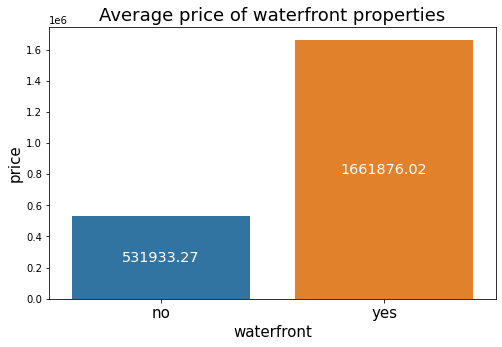

The percentage difference is:  212.42%


In [19]:
#Graph 
graph_bar(df=aux1, X='waterfront', Y='price', title= 'Average price of waterfront properties')
plt.show()

#Price difference
price_difference = ( (aux1['price'][1] - aux1['price'][0]) / aux1['price'][0] )*100
print(f'The percentage difference is: {price_difference: .2f}%')

<h3> H2: Buildings older than 1955 are 50% cheaper on average.</h3>

<b> False: </b> The building built before 1955 are 1.64% cheaper than those built after 1955 

In [20]:
#Filtering the data
aux_built= data[['price','yr_built']].copy()

#Changing the 'yr_built' feature
aux_built['yr_built'] = aux_built['yr_built'].apply( lambda x: 'Before 1955' if (x <= 1955) else 'After 1955' )

#Grouping the data
aux_built1 = aux_built.groupby('yr_built').mean().reset_index()
aux_built1


,yr_built,price
0,After 1955,543118.854016
1,Before 1955,534377.117823


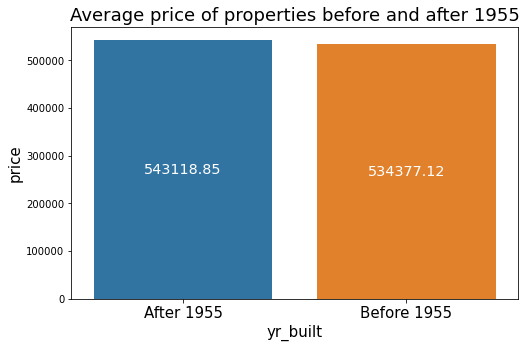

The building built before 1955 are 1.64% cheaper than those built after 1955


In [21]:
#Graph 
graph_bar(df = aux_built1, X='yr_built', Y='price', title= 'Average price of properties before and after 1955')
plt.show()

#Price difference
price_difference_built = ( (aux_built1['price'][0] - aux_built1['price'][1]) / aux_built1['price'][1] )*100
print(f'The building built before 1955 are {price_difference_built:.2f}% cheaper than those built after 1955')

<h3> H3: Properties without a basement have a total area (sqrt_lot) 40% larger than properties with a basement.</h3>

<b> False: </b> The buildings with no basement are 22.79%  more expensive than those that have basement

In [22]:
#Filtering the data
aux_basement= data[['sqft_basement', 'sqft_lot']].copy()

#Changing the 'yr_built' feature
aux_basement['sqft_basement'] = aux_basement['sqft_basement'].apply( lambda x: 'No Basement' if (x == 0) else 'With basement' )

#Grouping the data
aux_basement1 = aux_basement.groupby('sqft_basement').mean().reset_index()
aux_basement1

,sqft_basement,sqft_lot
0,No Basement,16326.852851
1,With basement,13296.410214


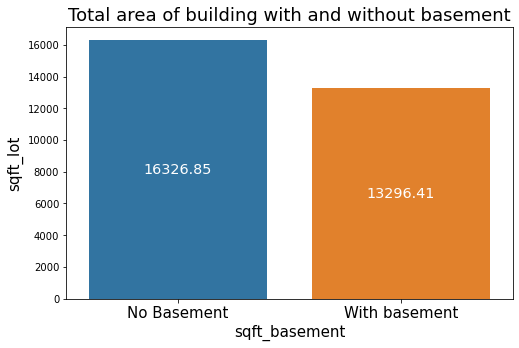

The buildings with no basement are 22.79%  more expensive than those that have basement


In [23]:
#Graph 
graph_bar(df = aux_basement1, X='sqft_basement', Y='sqft_lot', title= 'Total area of building with and without basement')
plt.show()

#Price difference
price_difference_basement = ( (aux_basement1['sqft_lot'][0] - aux_basement1['sqft_lot'][1]) / aux_basement1['sqft_lot'][1] )*100
print(f'The buildings with no basement are {price_difference_basement:.2f}%  more expensive than those that have basement')

<h3> H4: YoY (Year over Year) property price growth is 10%.</h3>

<b> False: </b> The price growths between 2014 and 2015 is 0.70% 

In [24]:
#Filtering the data
aux_yoy= data[['price', 'year']].copy()

#Grouping the data
aux_yoy1 = aux_yoy.groupby('year').mean().reset_index()
aux_yoy1

,year,price
0,2014,539325.212015
1,2015,543090.821387


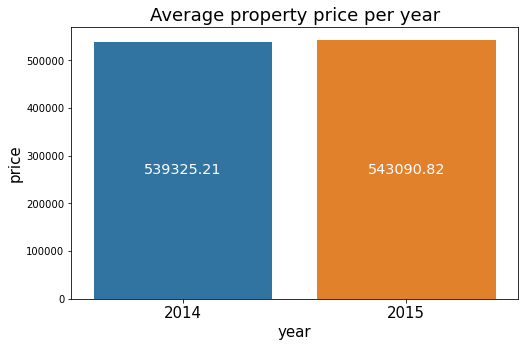

The price growths between 2014 and 2015 is 0.70% 


In [25]:
#Graph 
graph_bar(df = aux_yoy1, X='year', Y='price', title= 'Average property price per year')
plt.show()

#Price difference
price_difference_yoy = ( (aux_yoy1['price'][1] - aux_yoy1['price'][0]) / aux_yoy1['price'][0] )*100
print(f'The price growths between 2014 and 2015 is {price_difference_yoy:.2f}% ')

<h3> H5: Homes with 3 bathrooms have a 15% MoM (Month over Month) growth.</h3>

<b> False: </b> The largest positive variation was <b> 13,73% </b> 

In [26]:
#Filtering the data
aux_mom = data[['price', 'month', 'bathrooms']].copy()

#Grouping the data
aux_mom1 = aux_mom.loc[ aux_mom['bathrooms']==3 ].groupby(['month']).mean().reset_index()
aux_mom1.head()


,month,price,bathrooms
0,2014-05,690080.714286,3.0
1,2014-06,775057.564103,3.0
2,2014-07,741405.042857,3.0
3,2014-08,737576.562500,3.0
4,2014-09,645246.887324,3.0


In [27]:
#Data Treatment

#Feature Variation
aux_mom1['var_MoM'] = aux_mom1['price'].rolling(window=2).apply( lambda x: (x.iloc[1] / x.iloc[0] -1) * 100 )


# Mean, max and min variation

var_mom_mean = round(aux_mom1['var_MoM'].mean(),2)
max_ = round(aux_mom1['var_MoM'].max(),2)
min_ = round(aux_mom1['var_MoM'].min(),2)
print(f'The average MoM in the period is: {var_mom_mean}%')



The average MoM in the period is: 0.29%


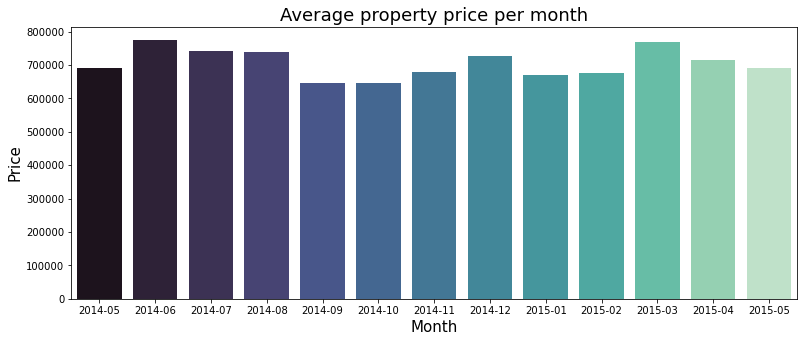

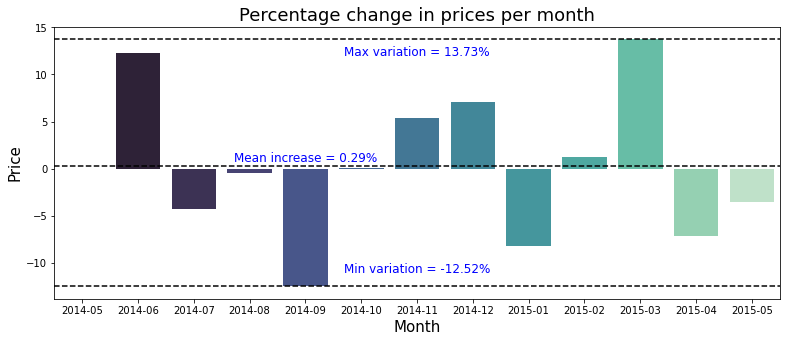

In [28]:
#Graph I (Average property price per month)

#Creating Graph
plt.figure(figsize=(13,5))
graph = sns.barplot( data= aux_mom1, x='month', y='price', palette = 'mako')

#Creating figure
graph.set_title('Average property price per month', size=18)
graph.set_xlabel('Month', size=15)
graph.set_ylabel('Price', size=15)

#Graph II (MoM variation)

#Creating Graph
plt.figure(figsize=(13,5))
graph = sns.barplot( data= aux_mom1, x='month', y='var_MoM', palette = 'mako')

#Creating figure
graph.set_title('Percentage change in prices per month', size=18)
graph.set_xlabel('Month', size=15)
graph.set_ylabel('Price', size=15)

#Creating the --- lines
plt.axhline(y = var_mom_mean, color = 'k', linestyle = '--')
plt.text(4, 1.8, f'Mean increase = {var_mom_mean}%', rotation=0,
         horizontalalignment='center', verticalalignment='top',
         multialignment='center', color='blue', fontsize=12)

plt.axhline(y = max_, color = 'k', linestyle = '--')
plt.text(6, 13, f'Max variation = {max_}%', rotation=0,
         horizontalalignment='center', verticalalignment='top',
         multialignment='center', color='blue', fontsize=12)

plt.axhline(y = min_, color = 'k', linestyle = '--') 
plt.text(6, -10, f'Min variation = {min_}%', rotation=0,
         horizontalalignment='center', verticalalignment='top',
         multialignment='center', color='blue', fontsize=12)



plt.show()

<h3> H6: Homes sold in winter are 50% cheaper than in other seasons.</h3>

<b> False: </b>  The houses price in winter are <b>3.92%</b> cheaper

In [29]:
#Filtering the data
aux_season = data[['price', 'seasons']].copy()

#Grouping the data
aux_season['seasons'] = aux_season['seasons'].apply( lambda x: 'Winter' if (x == 'Winter') else 'Not_Winter' )

aux_season1 = aux_season.groupby('seasons').mean().reset_index()
aux_season1

,seasons,price
0,Not_Winter,543969.708142
1,Winter,523467.368056


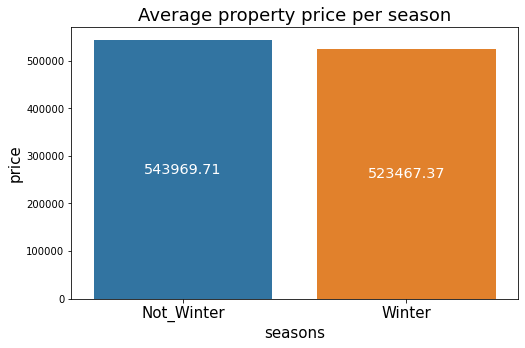

The houses price in winter are 3.92% cheaper


In [30]:
#Graph 
graph_bar(df = aux_season1, X='seasons', Y='price', title= 'Average property price per season')
plt.show()

#Price difference
price_difference_season = ( (aux_season1['price'][0] - aux_season1['price'][1]) / aux_season1['price'][1] )*100
print(f'The houses price in winter are {price_difference_season:.2f}% cheaper')

<h3> H7: Reformed homes are 50% cheaper than not reformed homes.</h3>

<b> False: </b> Renovates houses are <b> 43.53% </b> cheaper

In [31]:
#Filtering the data
aux_renovated = data[['price','yr_renovated']].copy()

#Grouping the data
aux_renovated['yr_renovated'] = aux_renovated['yr_renovated'].apply( lambda x: 'Yes' if (x == 0) else 'No' )
aux_renovated1 = aux_renovated.groupby('yr_renovated').mean().reset_index()
aux_renovated1.rename(columns={'yr_renovated': 'Renovated'}, inplace = True)
aux_renovated1

,Renovated,price
0,No,761718.497802
1,Yes,530718.888472


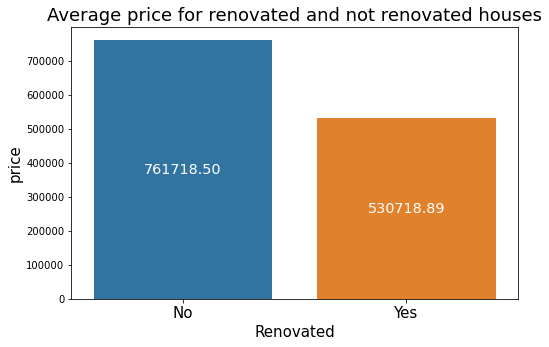

Renovates houses are 43.53% cheaper


In [46]:
#Graph 
graph_bar(df = aux_renovated1, X='Renovated', Y='price', title= 'Average price for renovated and not renovated houses')
plt.show()

#Price difference
price_difference_renovated = ( (aux_renovated1['price'][0] - aux_renovated1['price'][1]) / aux_renovated1['price'][1] )*100
print(f'Renovates houses are {price_difference_renovated:.2f}% cheaper')

<h2> 5. Solving business questions  </h2>

<h3> 1 Generating a report with property purchase suggestions </h3>

    Group data by region (zipcode and season).
    Calculate the median property price by region.
    Purchase suggestion: Select properties in good condition (condition >=4) and purchase price below the median value.  
    
<h3> 2 Generating a report with selling suggested prices for previously purchased properties.</h3>

    Group sold houses data by region (zipcode and season).
    Calculate the median proprety by region and season.
    Select from the database the houses that were suggested for purchase.  
    
    Conditions:
        1- If the purchase price is higher than the median of the season, the sale price will be increased by 10%.
        2- If the purchase price is below the median of the season, the sale price will be increased by 30%.
      

<h3> 5.1 Generating a report with property purchase suggestions </h3>

<h4> Filtering data and calculating the midian by the zipcode <h/4>

In [33]:
region_price_median = data[['zipcode','price']].groupby('zipcode').median().reset_index()
region_price_median = region_price_median.rename(columns={'price':'region_price_median'})

region_price_median.head()

,zipcode,region_price_median
0,98001,260000.0
1,98002,235000.0
2,98003,266500.0
3,98004,1150000.0
4,98005,765475.0


<h4> Merge the data obtained and creating a new feature with the median per region </h4>

In [34]:
data = pd.merge(data,region_price_median,on='zipcode',how='inner')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,day,week_of_year,month,year,seasons,region_price_median
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,no,0,...,47.5112,-122.257,1340,5650,13,42,2014-10,2014,Fall,279000.0
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,no,0,...,47.5009,-122.248,1190,6780,23,26,2014-06,2014,Summer,279000.0
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,no,2,...,47.5091,-122.244,2660,8712,17,29,2014-07,2014,Summer,279000.0
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,no,0,...,47.5053,-122.255,1320,7619,25,39,2014-09,2014,Fall,279000.0
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,no,0,...,47.5048,-122.272,1650,8775,27,9,2015-02,2015,Winter,279000.0


<h4> Creating the Purchase suggestion feauture </h4>

In [35]:
data['Recommendation'] = data[['price', 'region_price_median','condition']].apply( 
    lambda x: 'Buy' if (x['price'] < x['region_price_median']) & (x['condition'] >= 4 ) else 'Dont_Buy', axis = 1 )
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,day,week_of_year,month,year,seasons,region_price_median,Recommendation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,no,0,...,-122.257,1340,5650,13,42,2014-10,2014,Fall,279000.0,Dont_Buy
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,no,0,...,-122.248,1190,6780,23,26,2014-06,2014,Summer,279000.0,Buy
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,no,2,...,-122.244,2660,8712,17,29,2014-07,2014,Summer,279000.0,Dont_Buy
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,no,0,...,-122.255,1320,7619,25,39,2014-09,2014,Fall,279000.0,Dont_Buy
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,no,0,...,-122.272,1650,8775,27,9,2015-02,2015,Winter,279000.0,Dont_Buy


<h4> Evaluating the number of houses that may be purchased in the portfolio </h4>

In [36]:
#Filtering the data
aux_buy = data[['Recommendation']].copy()

#Grouping the data
aux_buy1 = aux_buy.value_counts().to_frame().reset_index()
aux_buy1.rename(columns={0:'Number'}, inplace = True)
aux_buy1

,Recommendation,Number
0,Dont_Buy,17658
1,Buy,3776


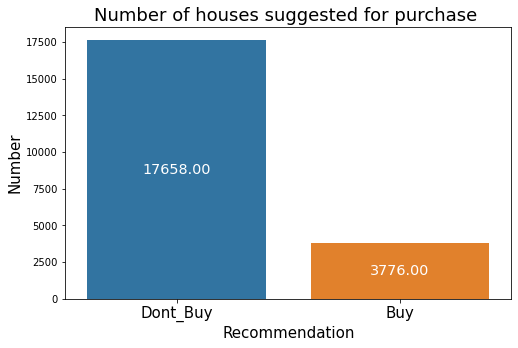

Number of houses suggested for purchase is 17.62%


In [37]:
#Graph 
graph_bar(df = aux_buy1, X='Recommendation', Y='Number', title= 'Number of houses suggested for purchase ')
plt.show()

#Impact of suggestions
percentage_suggestions = ( aux_buy1['Number'][1]  / (aux_buy1['Number'][0] + aux_buy1['Number'][1]) )*100
print(f'Number of houses suggested for purchase is {percentage_suggestions:.2f}%')

<h3> 5.2 Generating a report with selling suggested prices for previously purchased properties.</h3>

<h4> Filtering data and calculating the midian by the zipcode by season </h4>

In [38]:
season_price_median = data[['zipcode','seasons','price']].groupby(['zipcode','seasons']).median().reset_index()
season_price_median = season_price_median.rename(columns={'price':'median_price_per_zipcode'})
season_price_median.head()

,zipcode,seasons,median_price_per_zipcode
0,98001,Fall,250000.0
1,98001,Spring,262000.0
2,98001,Summer,260000.0
3,98001,Winter,264975.0
4,98002,Fall,236500.0


<h4> Merge the data obtained and creating a new feature with the median per region </h4>

In [39]:
data = pd.merge(data,season_price_median,on=['zipcode','seasons'],how='left',copy=False)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,day,week_of_year,month,year,seasons,region_price_median,Recommendation,median_price_per_zipcode
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,no,0,...,1340,5650,13,42,2014-10,2014,Fall,279000.0,Dont_Buy,281000.0
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,no,0,...,1190,6780,23,26,2014-06,2014,Summer,279000.0,Buy,272000.0
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,no,2,...,2660,8712,17,29,2014-07,2014,Summer,279000.0,Dont_Buy,272000.0
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,no,0,...,1320,7619,25,39,2014-09,2014,Fall,279000.0,Dont_Buy,281000.0
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,no,0,...,1650,8775,27,9,2015-02,2015,Winter,279000.0,Dont_Buy,265000.0


<h4> Filtering the database by suggested homes for purchase </h4>

In [40]:
#Filtering the data
data_purchased = data.copy()
data_purchased = data_purchased.loc[data_purchased['Recommendation'] == 'Buy']
data_purchased.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,day,week_of_year,month,year,seasons,region_price_median,Recommendation,median_price_per_zipcode
1,4060000240,2014-06-23,205425.0,2,1.0,880,6780,1.0,no,0,...,1190,6780,23,26,2014-06,2014,Summer,279000.0,Buy,272000.0
10,561000075,2014-12-31,260000.0,3,1.0,1180,5350,1.5,no,0,...,1490,5350,31,1,2014-12,2014,Winter,279000.0,Buy,265000.0
19,3352402236,2014-12-15,252500.0,3,2.0,1150,6000,1.0,no,0,...,1980,6360,15,51,2014-12,2014,Fall,279000.0,Buy,281000.0
27,185000118,2015-02-23,212000.0,4,2.0,1880,7500,1.0,no,0,...,1670,14350,23,9,2015-02,2015,Winter,279000.0,Buy,265000.0
35,3810000465,2014-05-20,243000.0,2,1.0,1770,5522,1.5,no,0,...,1830,7378,20,21,2014-05,2014,Spring,279000.0,Buy,285000.0


In [41]:
#Calculation of sales value
data_purchased['sale_price'] = data_purchased[['price', 'median_price_per_zipcode']].apply( 
    lambda x: x['price']*1.1 if(x['price'] > x['median_price_per_zipcode']) else  x['price']*1.1,axis=1)

#Profit calculation
data_purchased['profit'] = data_purchased['sale_price'] - data_purchased['price']

#Head
data_purchased.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,day,week_of_year,month,year,seasons,region_price_median,Recommendation,median_price_per_zipcode,sale_price,profit
1,4060000240,2014-06-23,205425.0,2,1.0,880,6780,1.0,no,0,...,23,26,2014-06,2014,Summer,279000.0,Buy,272000.0,225967.5,20542.5
10,561000075,2014-12-31,260000.0,3,1.0,1180,5350,1.5,no,0,...,31,1,2014-12,2014,Winter,279000.0,Buy,265000.0,286000.0,26000.0
19,3352402236,2014-12-15,252500.0,3,2.0,1150,6000,1.0,no,0,...,15,51,2014-12,2014,Fall,279000.0,Buy,281000.0,277750.0,25250.0
27,185000118,2015-02-23,212000.0,4,2.0,1880,7500,1.0,no,0,...,23,9,2015-02,2015,Winter,279000.0,Buy,265000.0,233200.0,21200.0
35,3810000465,2014-05-20,243000.0,2,1.0,1770,5522,1.5,no,0,...,20,21,2014-05,2014,Spring,279000.0,Buy,285000.0,267300.0,24300.0


<h4> Saving the dataset </h4>

In [42]:
#houses_recommedations = data.copy()
#houses_recommedations.to_csv(r'dashboard_house_rocket/houses_recommendations.csv')

<h2> 6. Business results  </h2>

<b> Assuming all suggested homes have been bought and sold.  
What would be the total profit made by the operation? </b>

In [43]:
#Calculating business results
profit = data_purchased['profit'].sum()
investiment = data_purchased['price'].sum()
sales_revenue = data_purchased['sale_price'].sum()

print(f'Total investiment: $ {investiment:.2f}')
print(f'Sales revenue:     $ {sales_revenue:.2f}')
print(f'Profit:            $ {profit:.2f}')

Total investiment: $ 1483423213.00
Sales revenue:     $ 1631765534.30
Profit:            $ 148342321.30


In [44]:
#Creating a dataframe using the previous results
results = pd.DataFrame ({'Total investiment':investiment,
           'Sales revenue': sales_revenue,
           'Profit':profit}, index=['Results'])
results

,Total investiment,Sales revenue,Profit
Results,1.483423e+09,1.631766e+09,148342321.3


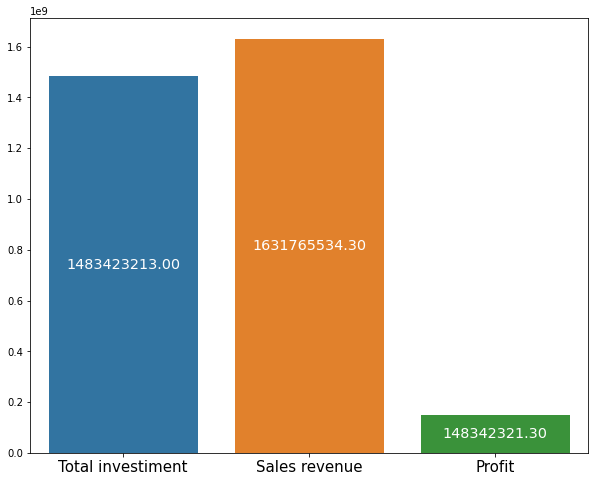

In [45]:
plt.figure(figsize = (10,8))
graph = sns.barplot(data = results)
plt.xticks(size=15)

#Including data values in the bars
for i in graph.containers:
    graph.bar_label(i, color='white', label_type= 'center',fontsize='x-large',fmt='%.2f')

plt.show()